Chapter 30  
# Mean Shift
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import MeanShift

## Load the Iris dataset 

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features (sepal length and sepal width)

## Generate a grid of points for visualization

In [7]:
x1_array = np.linspace(4, 8, 201)
x2_array = np.linspace(1, 5, 201)
xx, yy = np.meshgrid(x1_array, x2_array)
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten and combine into coordinate pairs

## Mean Shift clustering

In [9]:
ms = MeanShift(bandwidth=0.6, bin_seeding=True)  
# bandwidth controls the window size for density estimation
ms.fit(X)
labels = ms.labels_                 # cluster labels assigned to each sample
cluster_centers = ms.cluster_centers_  # coordinates of cluster centers
n_clusters = len(np.unique(labels))  # number of clusters detected

# Predict cluster labels for the grid points
Z = ms.predict(grid_points)
Z = Z.reshape(xx.shape)

## Visualization

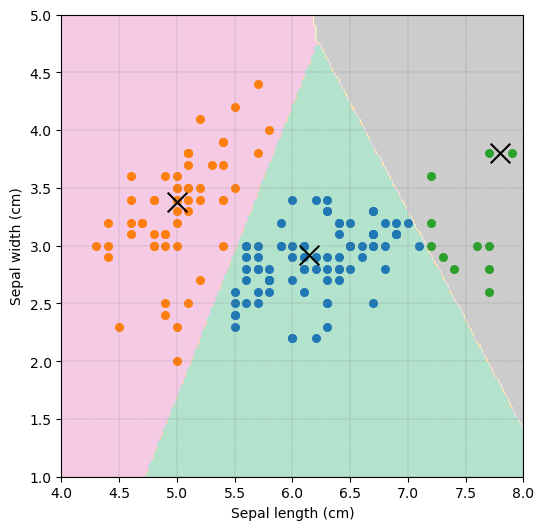

In [11]:
fig, ax = plt.subplots(figsize=(6, 6)) 

# Plot decision regions (cluster boundaries)
ax.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)

# Plot sample points for each cluster
for k in range(n_clusters):
    ax.scatter(X[labels == k, 0], X[labels == k, 1], s=30)

# Plot cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           marker='x', s=200, c='k')

# Axis labels and formatting
ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width (cm)")
ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')